In [1]:
import numpy as np
import pandas as pd

In [26]:
data = pd.read_csv(r"boston.csv",index_col=0)
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [27]:
class LinearRegression:
    '''
    使用python语言实现线性回归算法。(梯度下降)
    '''
    def __init__(self,alpha,times):
        '''
        初始化方法
        Parameters 
        ---- 
        alpha:float
            学习率。用来控制步长。权重调整的幅度
        times: int
            循环迭代的次数
            
        '''
        
        self.alpha = alpha
        self.times = times
    def fit(self,X,y):
        '''
        根据提供的训练数据，对模型进行训练
        Parameters 
        ---- 
        X:类数组类型。形状：[样本数量，特征数量]
            待训练的样本特征属性。(特征矩阵)
        y:类数组类型。形状：[样本数量]
            目标值(标签信息)
            
        '''
        X = np.asarray(X)
        y = np.asarray(y)
        #创建权重向量，初始值为0或任意其他的值，包含w0,长度比特征数量多1.
        self.w_ = np.zeros(X.shape[1]+1)#shape的返回值是一个元组：[样本数量，特征数量]
        #创建损失列表，用来保存每次迭代后的损失值，损失值计算：(预测值-真实值)的平方和除以2
        self.lose_ = []
        
        #进行循环多次迭代，每次迭代过程中不断调整权重值，使损失值不断减小
        for i in range(self.times):
            #y_hat指的是预测值
            y_hat = np.dot(X,self.w_[1:])+self.w_[0]#w0不参与点积运算
            #计算真实值与预测值之间的差距
            error = y-y_hat
            self.lose_.append(np.sum(error**2)/2)
            
            #根据差距调整权重w_,根据公式：调整为：权重(j) = 权重(j)-学习率*sum{(y-y_hat)*x(j)}
            self.w_[0]+=self.alpha*np.sum(error*1)
            self.w_[1:]+=self.alpha*np.dot(X.T,error)
          #为什么除以m之后训练效果，反而不好，使用+之后拟合效果也变差了
    def predict(self,X):
            '''
            根据参数传递的样本，对样本数据进行预测。
            Parameters 
            ---- 
            X:类数组类型。形状：[样本数量，特征数量]
                待测试的样本。 
            Returns
            ---- 
            result:数组类型
                预测结果 
            '''
            X = np.asarray(X)
            result = np.dot(X,self.w_[1:])+self.w_[0]
            return result

其中，np.zeros()产生的是一个一维数组，所以self.w_是一个一维数组，但是它却能够与二维数组相乘的原因：
书上原话：一个二维数组和一个大小合适的一维数组的矩阵点积运算之后会得到一个一维数组。
这里的大小合适，假定二维数组是矩阵，那么一维数组应该是M×1，点积后输出的结果应该是N×M * M×1 =N。输出的还是1维数组。

`
x = np.zeros(10).reshape(10)
y = np.ones(20).reshape(2,10)
z = np.dot(y,x)
z.shape
`
* 这里的输出(2,)此时是1维数组，完全成立，所以生成w_时，不用进行reshape

参考博客：
https://blog.csdn.net/weixin_42413531/article/details/102915045

In [28]:
#预测与检验（未标准化处理）
lr = LinearRegression(alpha=0.001,times=20)
t = data.sample(len(data),random_state=0)
train_X = t.iloc[:400,:-1]
train_y = t.iloc[:400,-1]
test_X = t.iloc[400:,:-1]
test_y = t.iloc[400:,-1]
lr.fit(train_X,train_y)
result = lr.predict(test_X)
display(np.mean((result-test_y)**2))
print(len(train_X))

2.779261031258233e+206

400


In [29]:
class StandardScaler:
    '''该类对数据进行标准化处理'''
    def fit(self,X):
        '''根据传递的样本，计算每个特征值的均值与标准差
        Parameters 
            ---- 
            X:类数组类型。形状：[样本数量，特征数量]
                训练数据，用来计算均值与标准差
        '''
        
        X = np.asarray(X)
        self.std_ = np.std(X,axis=0)#0表示按纵向的方式进行计算，std求标准差
        self.mean_ = np.mean(X,axis=0)
        
    def transform(self,X):
        '''
        对给定的数据X，进行标准化处理.(将X的每一列都变成标准正态分布的数据)
        Parameters 
        ---- 
        X:类数组类型。
            训练数据，用来计算均值与标准差
        Returns
        ---- 
        result: 类数组类型 。
            参数X转换成标准正态分布后的结果。
        '''
        return (X-self.mean_)/self.std_
    def fit_transform(self,X):
        '''
        对数据进行训练，并转换，返回转化之后的结果
        Parameters 
        ---- 
        X:类数组类型。
            待转换的数据
        Returns
        ---- 
        result: 类数组类型 。
            参数X转换成标准正态分布后的结果。
        '''
        self.fit(X)
        return self.transform(X)

In [63]:
#为了避免每个特征数量级的不同，从而在梯度下降的过程中带来影响。
#我们现在考虑对每个特征进行标准化处理
lr = LinearRegression(alpha=0.0005,times=20)
t = data.sample(len(data),random_state=0)
s = StandardScaler()
train_X = t.iloc[:400,:-1]
train_y = t.iloc[:400,-1]
test_X = t.iloc[400:,:-1]
test_y = t.iloc[400:,-1]
yy = test_y.copy()#复制真实值
# print(yy)
# print(test_y)
train_X = s.fit_transform(train_X)
train_y = s.fit_transform(train_y)
test_X = s.fit_transform(test_X)
test_y = s.fit_transform(test_y)
lr.fit(train_X,train_y)
result = lr.predict(test_X)
print(result)
print(test_y)
display(np.mean((result-test_y)**2))

280    35.1
228    31.6
149    17.8
144    15.6
335    20.7
       ... 
324    18.5
193    36.4
118    19.2
48     16.6
173    23.1
Name: medv, Length: 106, dtype: float64
280    35.1
228    31.6
149    17.8
144    15.6
335    20.7
       ... 
324    18.5
193    36.4
118    19.2
48     16.6
173    23.1
Name: medv, Length: 106, dtype: float64
[ 1.09286121  0.92605703 -1.21051238 -0.95631492 -0.02608739  1.18117415
 -0.22173803 -0.21430583 -0.74719235  0.42047379  1.81373518  0.29115954
  1.60359014  0.22637638 -0.21632274 -0.83600622 -0.99350477 -0.89445388
 -0.32266044 -2.06230764  0.48926307  0.2921901   1.75223894 -0.13885494
  0.06256589  0.93188234  0.78042589 -1.37229839  0.25285381  2.04413874
 -0.52348642 -0.37546983  0.2625436  -0.38006071 -1.70132749 -0.29763255
  1.26506494 -0.62631293  0.02552195 -0.88950056  0.07961294 -0.30128025
 -0.41847928 -0.27204993  0.82197232 -0.20471231  0.75212288  1.17455837
  1.98872608 -0.34596615 -0.64529392  1.34516889 -0.38695831 -1.33855814

0.149072143352611

In [56]:
#可视化展示：
import matplotlib as mpl
from matplotlib import pyplot as plt
#默认情况下不支持中文显示，需要进行设置
#设置黑体，支持中文显示
mpl.rcParams["font.family"] = "SimHei"
#在设置中文字体时，能够正常的显示符号
mpl.rcParams["axes.unicode_minus"] = False

280    31.457156
228    33.569113
149    43.169743
144    20.787466
335     2.558727
         ...    
324    13.844602
193    28.149401
118     8.376100
48     13.154582
173    45.472106
Name: medv, Length: 106, dtype: float64
280    35.1
228    31.6
149    17.8
144    15.6
335    20.7
       ... 
324    18.5
193    36.4
118    19.2
48     16.6
173    23.1
Name: medv, Length: 106, dtype: float64


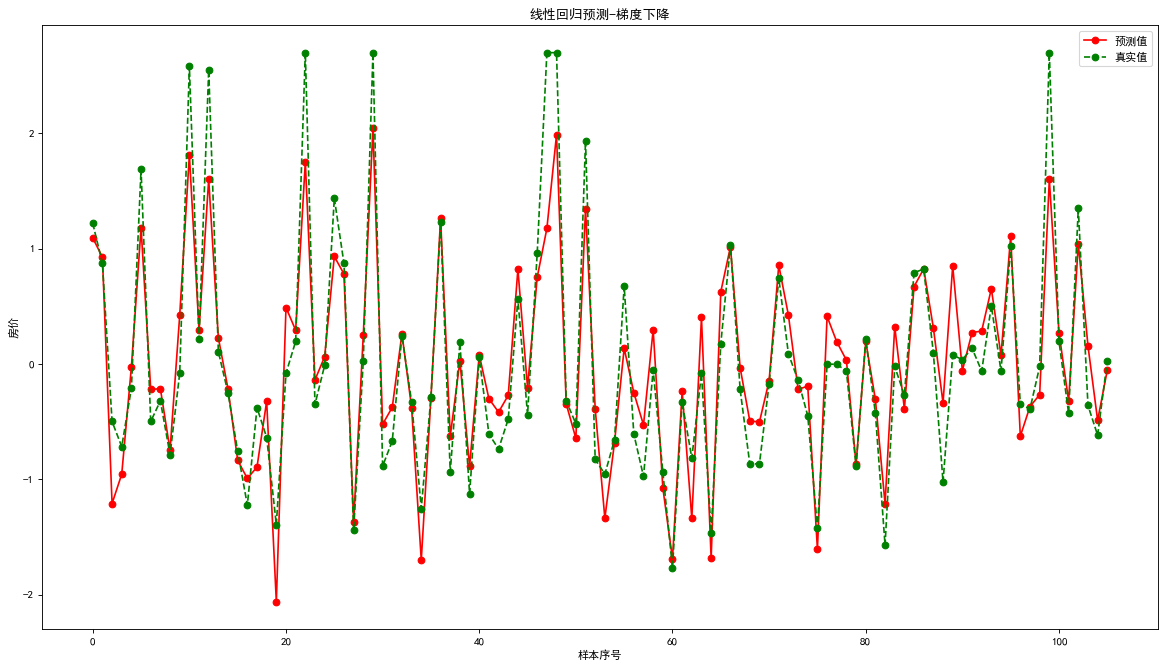

In [67]:
#通过比例来得到真实的房价
result_true = yy*(np.abs(result)/np.abs(test_y))
print(result_true)
print(yy)
plt.figure(figsize=(18,10),dpi=80)
# plt.plot(result_true.values,"ro-",label="预测值")
plt.plot(result,"ro-",label="预测值")
#绘制真实值
# plt.plot(yy.values,"go--",label="真实值")
plt.plot(test_y.values,"go--",label="真实值")
plt.title("线性回归预测-梯度下降")
plt.xlabel("样本序号")
plt.ylabel("房价")
plt.legend()
plt.show()

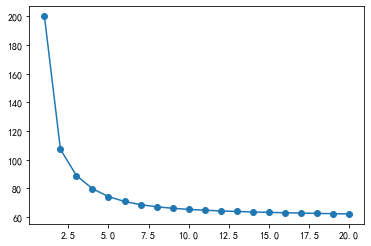

In [36]:
#绘制累积的误差值，并查看变化
plt.plot(range(1,lr.times+1),lr.lose_,"o-")
plt.show()

In [68]:
#绘制直线拟合房价，只选择其中的一个维度，这样方便展示
lr = LinearRegression(alpha=0.0005,times=50)
t = data.sample(len(data),random_state=0)
train_X = t.iloc[:400,5:6]#这样5:6切片处理得到的是二维数组类型
train_y = t.iloc[:400,-1]
test_X = t.iloc[400:,5:6]
test_y = t.iloc[400:,-1]


#对数据进行标准化处理
s = StandardScaler()
train_X = s.fit_transform(train_X)
test_X = s.transform(test_X)
s2 = StandardScaler()
train_y = s2.fit_transform(train_y)
test_y = s2.transform(test_y)

lr.fit(train_X,train_y)
result = lr.predict(test_X)
display(np.mean((result-test_y)**2))

0.46071758937162166

array([-3.07753822e-16,  6.54984608e-01])

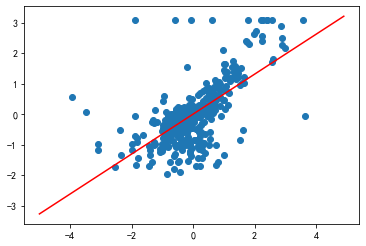

In [75]:
plt.scatter(train_X["rm"],train_y)
display(lr.w_)
#构建方程y = -3.07753822e-16+6.54984608e-01*x
x = np.arange(-5,5,0.1)
y = -3.07753822e-16+6.54984608e-01*x
# plt.plot(x,y,"r")
# plt.show()
#也可以这样：直接通过预测值来用
plt.plot(x,lr.predict(x.reshape(-1,1)),"r")
plt.show()